<a href="https://colab.research.google.com/github/shofydidntsleep/AIML-Hub/blob/main/TProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from google.colab import files
from collections import Counter
from sklearn.model_selection import train_test_split

##Upload Dataset

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle dataset download -d nareshbhat/health-care-data-set-on-heart-attack-possibility

In [ ]:
!kaggle dataset download -d johnsmith88/heart-disease-dataset

In [ ]:
!kaggle dataset download -d andrewmvd/heart-failure-clinical-data

In [ ]:
!unzip heart.zip

##Baca Dataset

In [ ]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Memperbaiki Missing Value (Biarian Aja)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

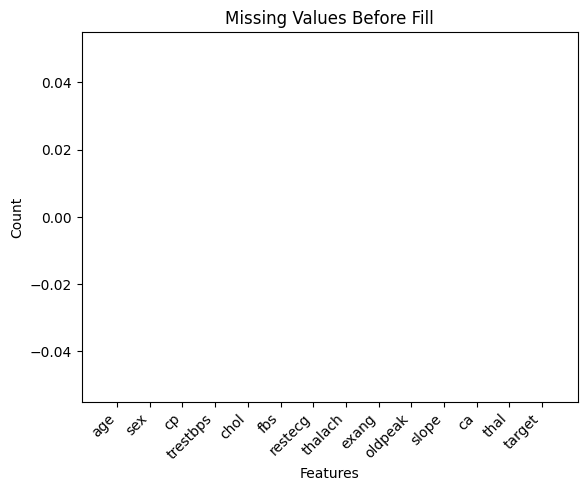

In [ ]:
missing_before = df.isnull().sum()

plt.bar(missing_before.index, missing_before.values, color='blue', alpha=0.7)
plt.title('Missing Values Before Fill')
plt.xlabel('Features')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df[df['heart']==0].describe()

In [ ]:
df[df['heart']==1].describe()

In [ ]:
df[df['heart']==0][['']].median()

In [ ]:
df[df['heart']==1][['']].median()

In [ ]:
df['ph'].fillna(value=df['ph'].median(),inplace=True)

In [ ]:
df_filled = df.copy()
df_filled[''].fillna(value=df_filled[''].median(), inplace=True)
missing_after = df_filled.isnull().sum()

##Normalisasi Dataset

In [ ]:
result0 = df[df['target']==0]
result1 = df[df['target']==1]

In [ ]:
def minmax(data):
  edit = data.copy(deep=True)
  for cols in data.columns[:-1]:
    max = data[cols].max()
    min = data[cols].min()
    edit[cols] = (data[cols] - min) / (max - min)

  return edit

data = minmax(df)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0


##Split Dataset

In [ ]:
X = data.drop('target', axis=1)
Y = data['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

212
91


##Algoritma KNN

In [ ]:
def jarakEu(data1, data2):
    jarak = np.square(data1 - data2)
    jarak = np.sum(jarak)
    return np.sqrt(jarak)

In [ ]:
def knn(k, datalatih, labellatih, datauji):
    jarak = np.array([jarakEu(datalatih.iloc[x], datauji) for x in range(datalatih.shape[0])])
    indeks_k_minimum = jarak.argsort()[:k]
    k_kelas = labellatih.iloc[indeks_k_minimum].to_numpy()
    counter = Counter(k_kelas)
    kelas_uji = counter.most_common(1)[0][0]
    return kelas_uji

In [ ]:
k_parameter = 7

In [ ]:
predictions_knn = [knn(k_parameter, X_train, Y_train, x_test) for _, x_test in X_test.iterrows()]

##Algoritma Naive Bayes

In [ ]:
def hitung_prior(list_kelas):
    n_data = len(list_kelas)
    prior = Counter(list_kelas)
    for key in prior.keys():
        prior[key] = prior[key] / n_data
    return prior

In [ ]:
def hitung_rata2_std_kelas(input_data):
    list_columns = input_data.columns[:-1]
    class_column_name = input_data.columns[-1]
    list_class = set(input_data[class_column_name])

    rata2 = {}
    std = {}
    for column in list_columns:
        for a_class in list_class:
            rata2[(a_class, column)] = input_data.loc[input_data[class_column_name] == a_class][column].mean()
            std[(a_class, column)] = input_data.loc[input_data[class_column_name] == a_class][column].std()

    return rata2, std

In [ ]:
def hitung_likelihood_gaussian(data, rata2, std):
    hasil = (1 / (math.sqrt(2 * math.pi * (std ** 2)))) * math.exp((-1 * ((data - rata2) ** 2)) / (2 * (std ** 2)))
    return hasil

In [ ]:
def training_nb(data_latih):
    class_column_name = data_latih.columns[-1]
    prior = hitung_prior(data_latih[class_column_name])
    rata2, std = hitung_rata2_std_kelas(data_latih)
    list_class = set(data_latih[class_column_name])
    list_columns = data_latih.columns[:-1]

    model = {}
    model['prior'] = prior
    model['rata2'] = rata2
    model['std'] = std
    model['list_class'] = list_class
    model['list_columns'] = list_columns

    return model

In [ ]:
def testing_nb(model, data_uji):
    prior = model['prior']
    rata2 = model['rata2']
    std = model['std']
    list_class = model['list_class']
    list_columns = model['list_columns']

    posterior = dict.fromkeys(list_class, 1)

    for a_class in list_class:
        for column in list_columns:
            posterior[a_class] *= hitung_likelihood_gaussian(data_uji[column], rata2[(a_class, column)], std[(a_class, column)])

        posterior[a_class] *= prior[a_class]

    kelas_uji = max(posterior, key=posterior.get)

    return kelas_uji

In [ ]:
model_nb = training_nb(X_train)
predictions_nb = [testing_nb(model_nb, X_test.iloc[i]) for i in range(X_test.shape[0])]

##Uji Performansi

In [ ]:
def accuracy_score(Y_true, Y_pred):
    return np.mean(Y_true == Y_pred)

In [ ]:
def classification_report(Y_true, Y_pred):
    unique_labels = np.unique(Y_true)
    report = {}
    for label in unique_labels:
        true_positive = np.sum((Y_true == label) & (Y_pred == label))
        false_positive = np.sum((Y_true != label) & (Y_pred == label))
        false_negative = np.sum((Y_true == label) & (Y_pred != label))

        precision = true_positive / (true_positive + false_positive)
        recall = true_positive / (true_positive + false_negative)
        f1_score = 2 * (precision * recall) / (precision + recall)

        report[label] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}

    return report

In [ ]:
print("Hasil Klasifikasi dengan K-NN")
print("Akurasi:", accuracy_score(Y_test, predictions_knn))

print("\nHasil Klasifikasi dengan Naive Bayes")
print("Akurasi:", accuracy_score(Y_test, predictions_nb))

Hasil Klasifikasi dengan K-NN
Akurasi: 0.6593406593406593

Hasil Klasifikasi dengan Naive Bayes
Akurasi: 0.4835164835164835
